In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('StudentsPerformance.csv')
df.info() # check the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       274 non-null    object
 1   race/ethnicity               274 non-null    object
 2   parental level of education  274 non-null    object
 3   lunch                        274 non-null    object
 4   test preparation course      274 non-null    object
 5   math score                   274 non-null    int64 
 6   reading score                274 non-null    int64 
 7   writing score                274 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


In [150]:
df.shape #used to get the shape of a Pandas DataFrame.

(274, 8)

In [151]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [152]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
269,female,group E,some college,free/reduced,none,71,76,70
270,male,group C,bachelor's degree,standard,none,69,63,61
271,male,group C,some college,standard,none,58,49,42
272,female,group D,associate's degree,free/reduced,none,47,53,58


In [153]:
df.describe() #to generate descriptive statistics about a DataFrame

,math score,reading score,writing score
count,274.000000,274.000000,274.000000
mean,65.182482,68.087591,66.839416
std,15.434949,15.362041,15.626001
min,0.000000,17.000000,10.000000
25%,56.000000,56.000000,56.000000
50%,65.000000,69.000000,69.000000
75%,76.000000,79.750000,77.750000
max,100.000000,100.000000,100.000000


In [154]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [155]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
269,female,group E,some college,free/reduced,none,71,76,70
270,male,group C,bachelor's degree,standard,none,69,63,61
271,male,group C,some college,standard,none,58,49,42
272,female,group D,associate's degree,free/reduced,none,47,53,58
273,female,group D,some college,standard,none,65,70,71


In [156]:
#data cleaning
#checking missing values
df.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
269,False,False,False,False,False,False,False,False
270,False,False,False,False,False,False,False,False
271,False,False,False,False,False,False,False,False
272,False,False,False,False,False,False,False,False


In [157]:
df.isnull().sum() #To check every column of the missing values or null values in the dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [158]:
df.duplicated().sum() # dataset has any duplicated values present or not

0

In [159]:
#printing categorical value
categorical_cols=df.select_dtypes(include="object").columns
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [160]:
df.nunique() #Number of Unique Values in Each Column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     69
reading score                  60
writing score                  68
dtype: int64

In [161]:
#Exploring Data with unique values
print("gender:  ",end=" ")
print(df["gender"].unique())

print("'race/ethnicity:  ",end=" ")
print(df["race/ethnicity"].unique())

print("parental level of education:  ",end=" ")
print(df["parental level of education"].unique())

print("lunch:  ",end=" ")
print(df["lunch"].unique())

print("test preparation course:  ",end=" ")
print(df["test preparation course"].unique())

gender:   ['female' 'male']
'race/ethnicity:   ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:   ['standard' 'free/reduced']
test preparation course:   ['none' 'completed']


In [162]:
#Adding extra columns
df["Average Score"]=(df["math score"]+df["reading score"]+df["writing score"])/3

#initializing the passmarks
passmark=35

#calculating percentage
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

#defining the grade function
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'

#Applying the grade function to DataFrame rows
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,76.333333,B


In [163]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,Percentage,grade
269,female,group E,some college,free/reduced,none,71,76,70,72.333333,72.333333,B
270,male,group C,bachelor's degree,standard,none,69,63,61,64.333333,64.333333,C
271,male,group C,some college,standard,none,58,49,42,49.666667,49.666667,E
272,female,group D,associate's degree,free/reduced,none,47,53,58,52.666667,52.666667,D
273,female,group D,some college,standard,none,65,70,71,68.666667,68.666667,C


In [164]:
df.describe()

,math score,reading score,writing score,Average Score,Percentage
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,65.182482,68.087591,66.839416,66.703163,66.703163
std,15.434949,15.362041,15.626001,14.832873,14.832873
min,0.000000,17.000000,10.000000,9.000000,9.000000
25%,56.000000,56.000000,56.000000,56.166667,56.166667
50%,65.000000,69.000000,69.000000,68.333333,68.333333
75%,76.000000,79.750000,77.750000,77.916667,77.916667
max,100.000000,100.000000,100.000000,99.666667,99.666667


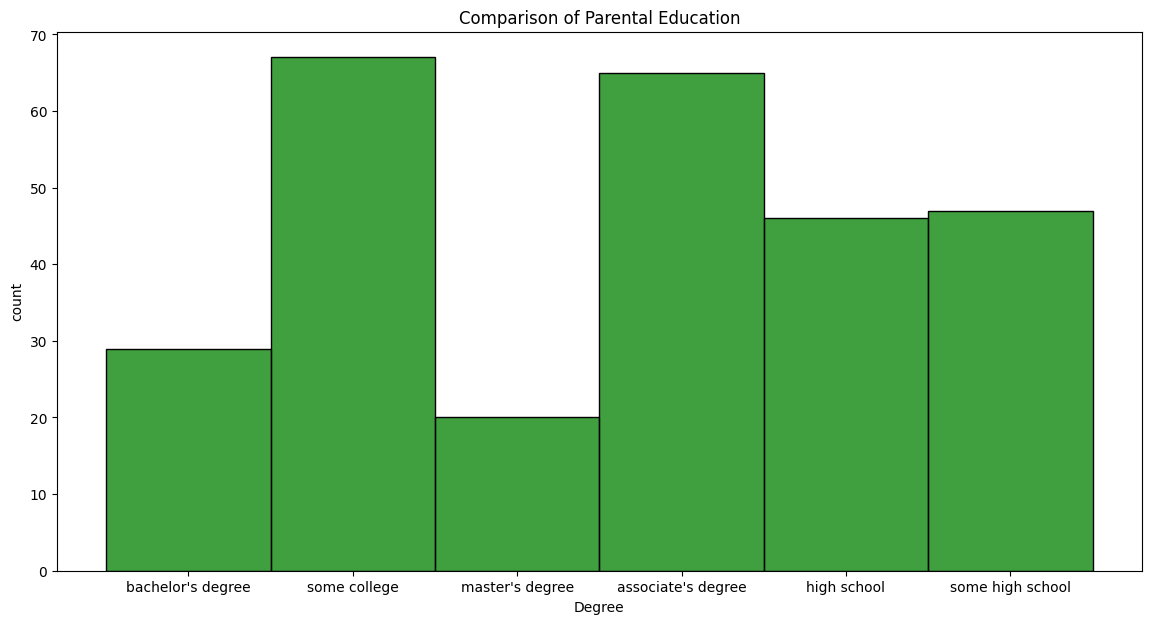

In [165]:
#Parental Level of Education Column

plt.rcParams['figure.figsize'] = (14, 7)
sns.histplot(df["parental level of education"],edgecolor='black',color='green')
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

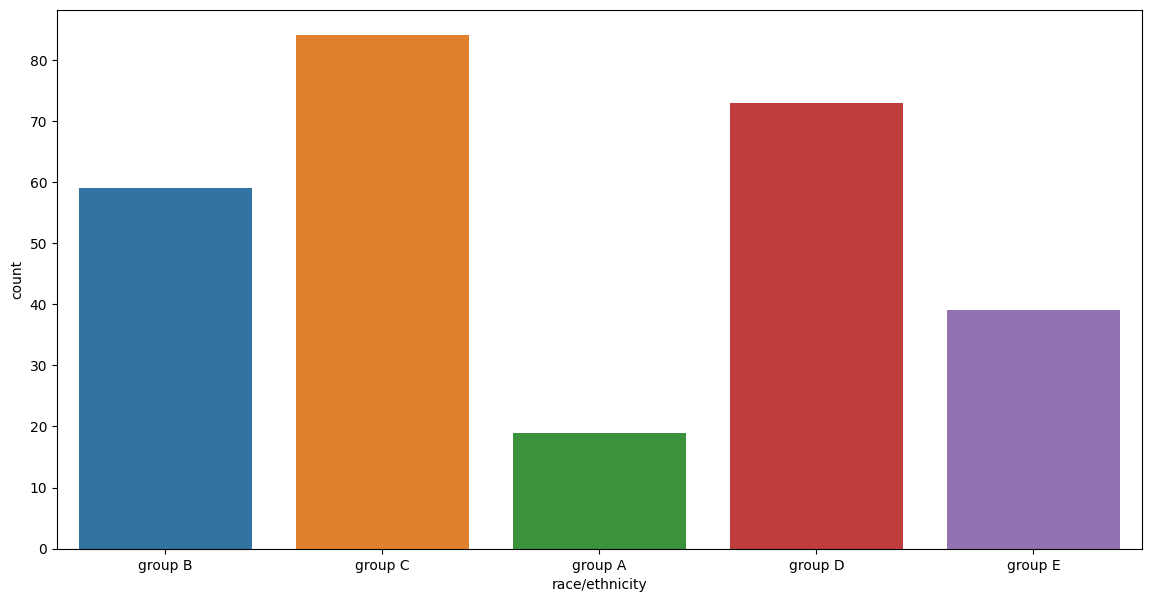

In [166]:
sns.countplot(x='race/ethnicity',data=df)
plt.show()

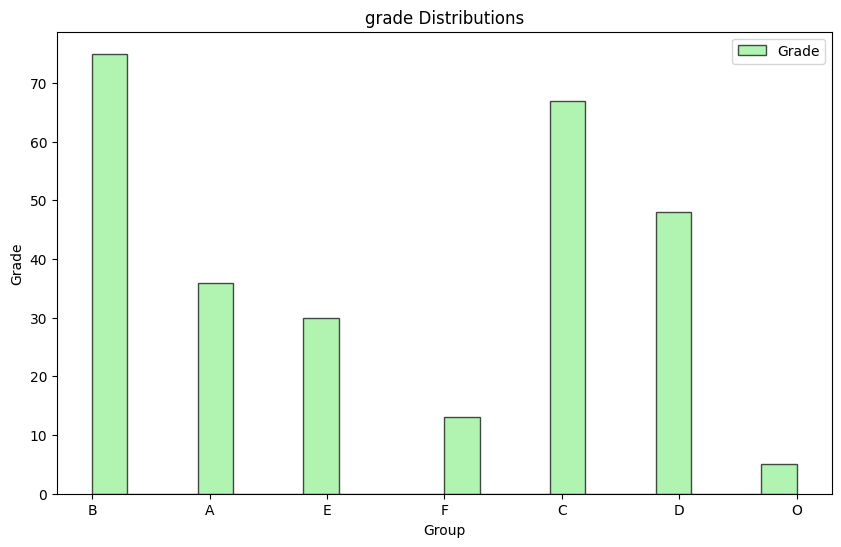

In [167]:
plt.figure(figsize=(10, 6))

# Plot histograms for Math Score, Reading Score, and Writing Score on the same set of axes
plt.hist(df['grade'], bins=20, alpha=0.7, label='Grade', color='lightgreen', edgecolor='black')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Grade')
plt.title('grade Distributions')
plt.legend()  # Show legend indicating which color corresponds to which score

# Show the combined histogram
plt.show()


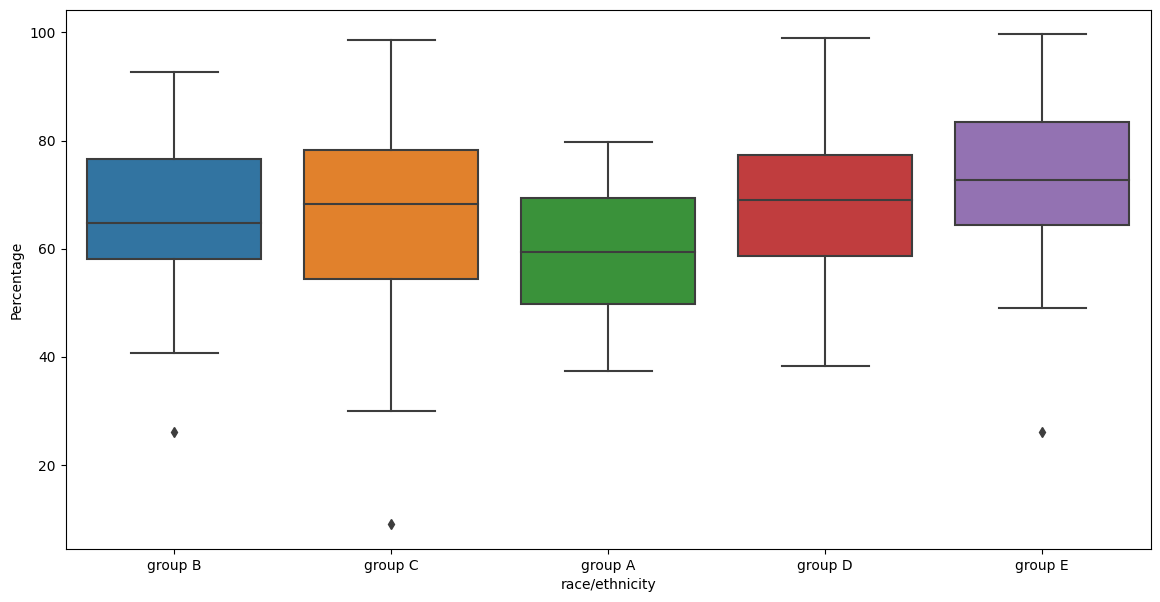

In [168]:
sns.boxplot(y=df["Percentage"],x=df["race/ethnicity"])
plt.show()

<Axes: xlabel='race/ethnicity', ylabel='Average Score'>

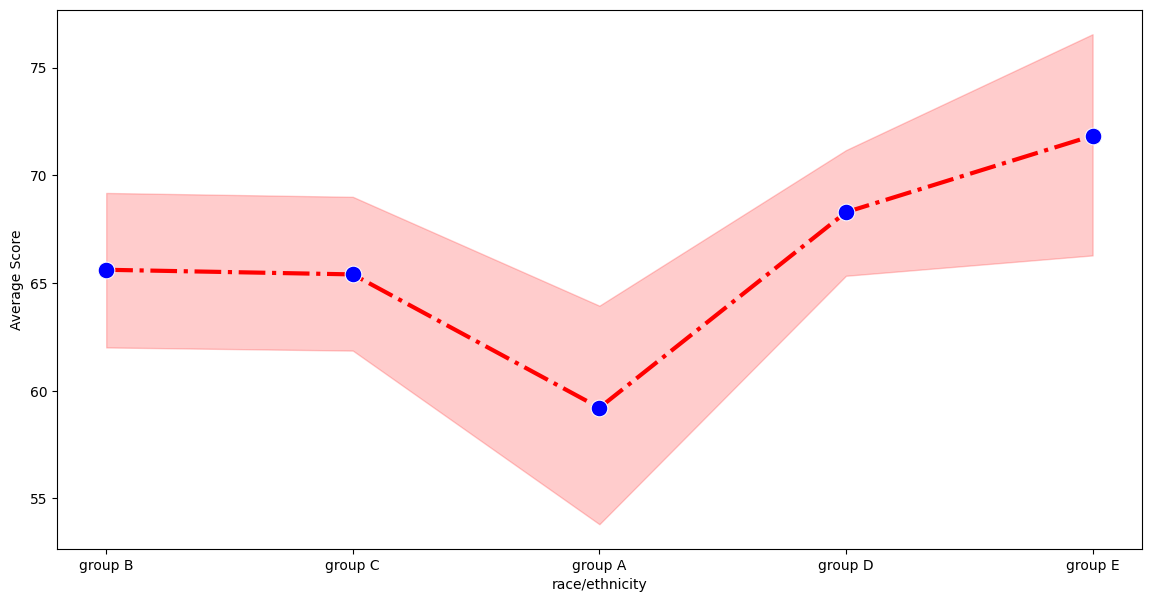

In [169]:
sns.lineplot(x="race/ethnicity",y="Average Score",color="red",linestyle="dashdot",linewidth=3,marker='o',markerfacecolor="blue",markersize=12,data=df)

<Axes: xlabel='Average Score', ylabel='math score'>

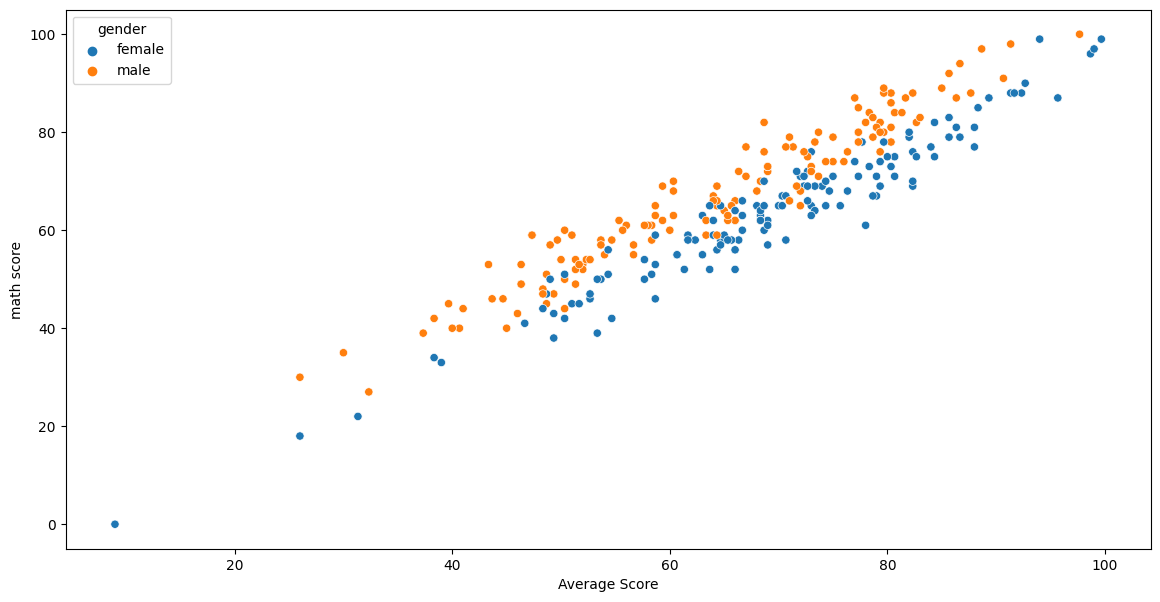

In [170]:
#Student performance in subjects based on gender
sns.scatterplot(x=df['Average Score'],y=df['math score'],hue=df['gender'])

In [171]:
#Data Manipuation
gender = {
    'male':0,
    'female':1
}
race = {
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4
}
df['gender']=df['gender'].map(gender)
df['race/ethnicity']=df['race/ethnicity'].map(race)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,Percentage,grade
0,1,1,bachelor's degree,standard,none,72,72,74,72.666667,72.666667,B
1,1,2,some college,standard,completed,69,90,88,82.333333,82.333333,A
2,1,1,master's degree,standard,none,90,95,93,92.666667,92.666667,A
3,0,0,associate's degree,free/reduced,none,47,57,44,49.333333,49.333333,E
4,0,2,some college,standard,none,76,78,75,76.333333,76.333333,B


In [172]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,Percentage,grade
269,1,4,some college,free/reduced,none,71,76,70,72.333333,72.333333,B
270,0,2,bachelor's degree,standard,none,69,63,61,64.333333,64.333333,C
271,0,2,some college,standard,none,58,49,42,49.666667,49.666667,E
272,1,3,associate's degree,free/reduced,none,47,53,58,52.666667,52.666667,D
273,1,3,some college,standard,none,65,70,71,68.666667,68.666667,C


In [173]:
level = {
    "bachelor's degree":0,
    'some college':1,
    "master's degree":2,
    "associate's degree":3,
    "high school":4,
    "some high school":5
}
df['parental level of education']=df['parental level of education'].map(level)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,Percentage,grade
0,1,1,0,standard,none,72,72,74,72.666667,72.666667,B
1,1,2,1,standard,completed,69,90,88,82.333333,82.333333,A
2,1,1,2,standard,none,90,95,93,92.666667,92.666667,A
3,0,0,3,free/reduced,none,47,57,44,49.333333,49.333333,E
4,0,2,1,standard,none,76,78,75,76.333333,76.333333,B


In [174]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,Percentage,grade
269,1,4,1,free/reduced,none,71,76,70,72.333333,72.333333,B
270,0,2,0,standard,none,69,63,61,64.333333,64.333333,C
271,0,2,1,standard,none,58,49,42,49.666667,49.666667,E
272,1,3,3,free/reduced,none,47,53,58,52.666667,52.666667,D
273,1,3,1,standard,none,65,70,71,68.666667,68.666667,C


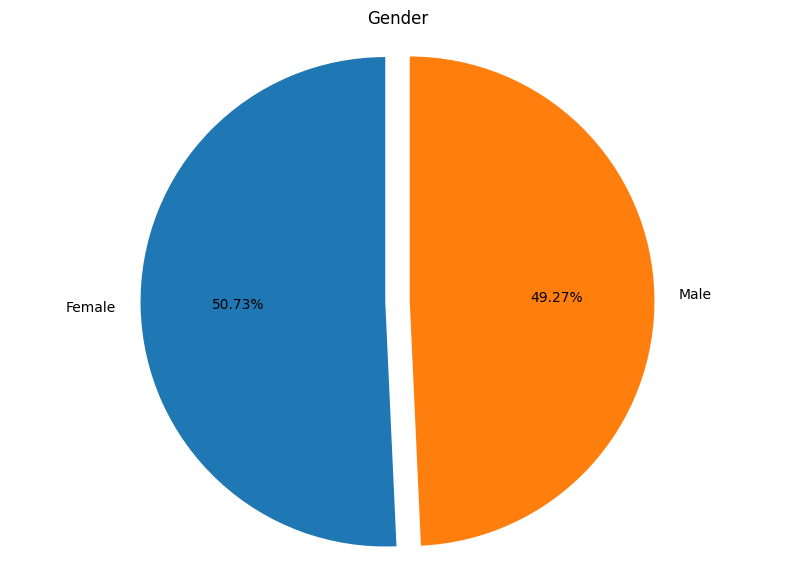

In [175]:
#PIE chart to demenstrate the total number of male and female
plt.figure(figsize=(10, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0,0.1],autopct='%1.2f%%', startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

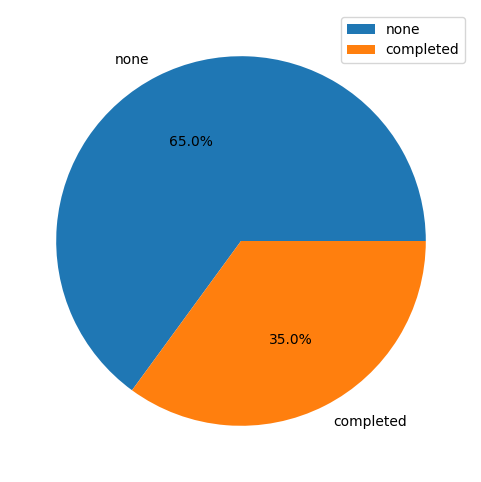

In [176]:
count_test = df['test preparation course'].value_counts()
labels = df['test preparation course'].value_counts().index
plt.figure(figsize= (6,6))
plt.pie(count_test,labels=labels,autopct='%1.1f%%')
plt.legend(labels)
plt.show()

<Axes: xlabel='Average Score', ylabel='math score'>

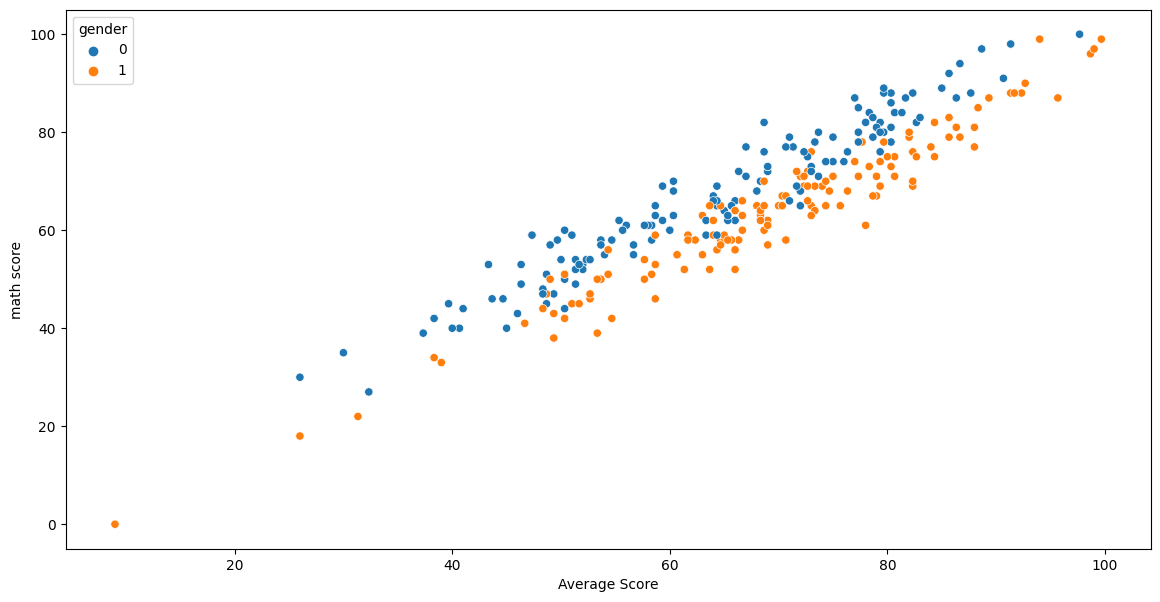

In [177]:
#Student performance in subjects based on gender
sns.scatterplot(x=df['Average Score'],y=df['math score'],hue=df['gender'])

<Axes: xlabel='Average Score', ylabel='reading score'>

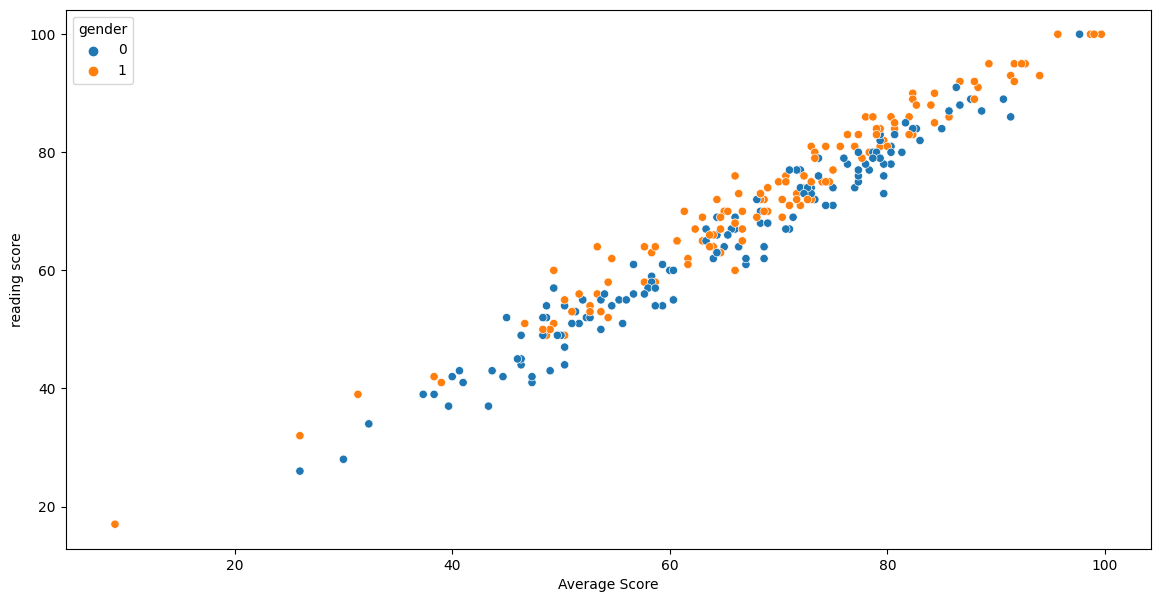

In [178]:
sns.scatterplot(x=df['Average Score'],y=df['reading score'],hue=df['gender'])

<Axes: xlabel='Average Score', ylabel='writing score'>

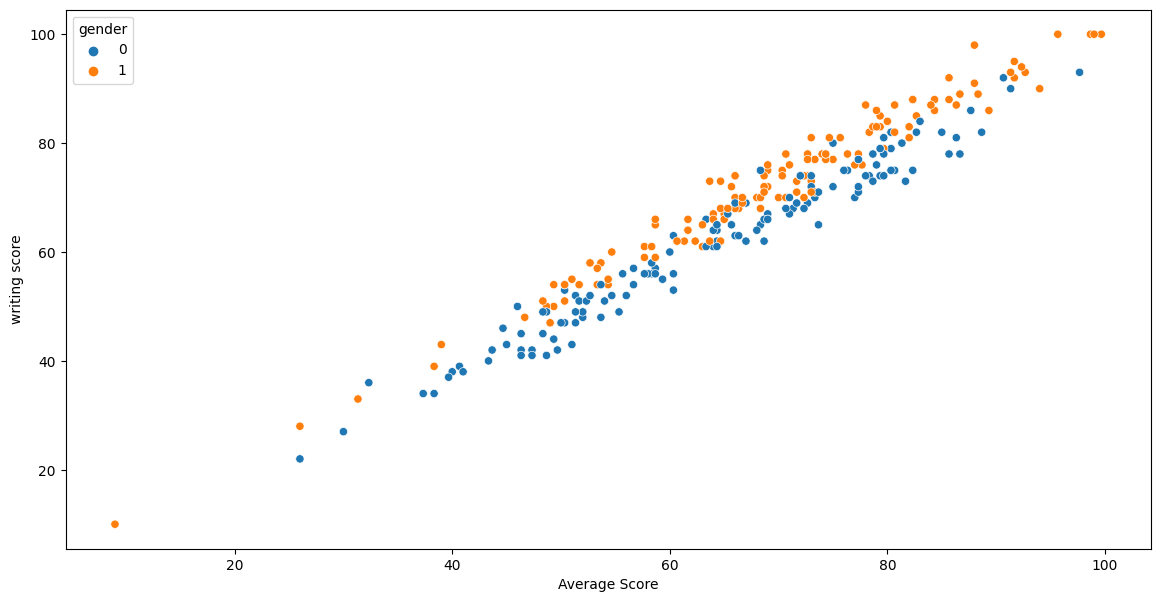

In [179]:
sns.scatterplot(x=df['Average Score'],y=df['writing score'],hue=df['gender'])

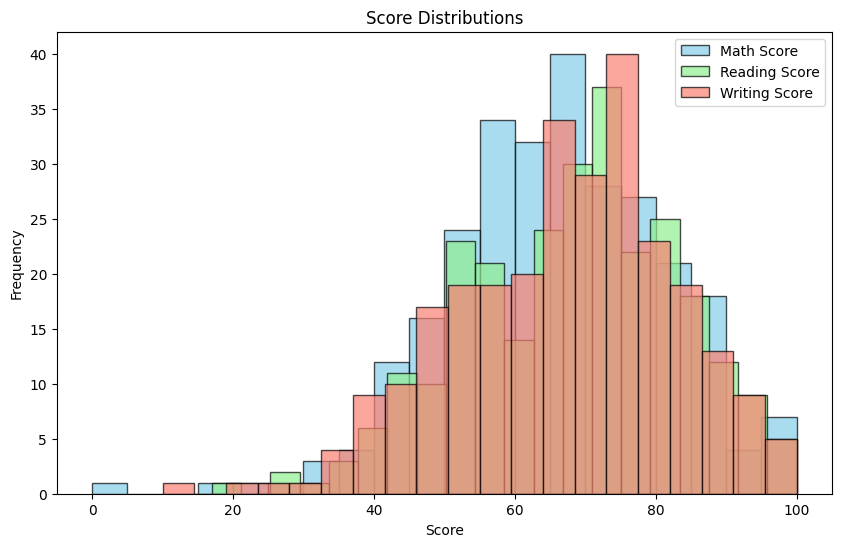

In [180]:
# Set up figure and axis
plt.figure(figsize=(10, 6))

# Plot histograms for Math Score, Reading Score, and Writing Score on the same set of axes
plt.hist(df['math score'], bins=20, alpha=0.7, label='Math Score', color='skyblue', edgecolor='black')
plt.hist(df['reading score'], bins=20, alpha=0.7, label='Reading Score', color='lightgreen', edgecolor='black')
plt.hist(df['writing score'], bins=20, alpha=0.7, label='Writing Score', color='salmon', edgecolor='black')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Score Distributions')
plt.legend()  # Show legend indicating which color corresponds to which score

# Show the combined histogram
plt.show()


Accuracy: 81.82% 





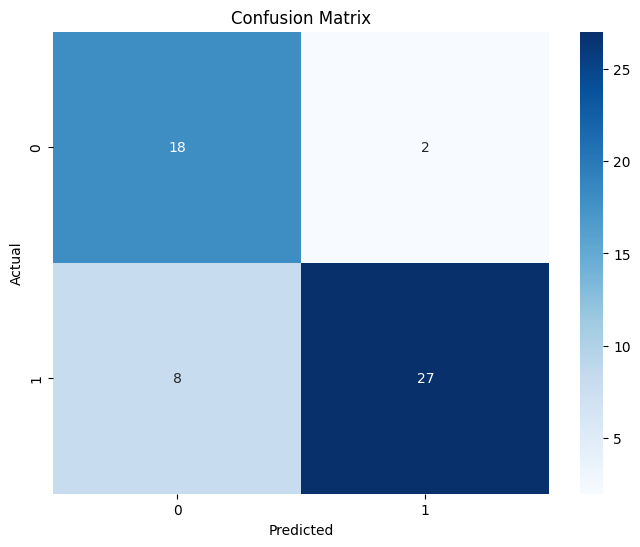

In [201]:
#Logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Feature selection
features = ['math score', 'reading score', 'writing score']  # Add more features as needed
X = df[features]
y = df['gender']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the test set
predictions = model.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}% \n\n\n")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
